In [1]:
import networkx as nx
from model.myGraph import MyGraph
from model.local_graph import kLocalGraph, load_local_graph
from running import rw_directory

from model.AMKS.amks import MultiHopAMKS
from model.WKS.wks import MultiHopWKS

import numpy as np

from sklearn.manifold import TSNE

from matplotlib import pyplot as plt
from adjustText import adjust_text

from datetime import datetime as dt

In [2]:
# 构造对称图的顶点
g_hat = nx.karate_club_graph()
g = MyGraph()
g.add_edges_from(g_hat.edges)
offset = max(g) + 1

g_hat = nx.relabel_nodes(g_hat, {origin: origin + offset for origin in g.nodes})
g.add_edges_from(g_hat.edges)
g.add_edge(0, offset)
g.set_graph_tag("mkarate")

In [3]:
# 给对称图加边
g_name = kLocalGraph.karate_mirrored0
g = load_local_graph(g_name)

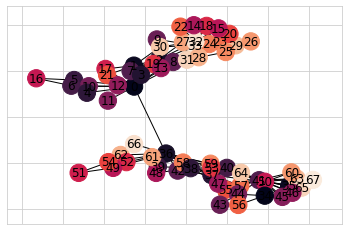

In [4]:
colors = [(node % (len(g) / 2)) / len(g) for node in g.nodes]
# 根据值的大小来设置节点的颜色,因为对称所以取模
# nx.is_connected(g)
pos = nx.layout.spring_layout(g)
nx.draw_networkx(g, node_color=colors, with_labels=True)
file_name = rw_directory.temp_file_path(6, "mkarate.gexf")
nx.write_gexf(g, file_name)
plt.show()

In [5]:
flag = 0
time = 0.5
flag_name = ""

if flag == 0:
    flag_name = "AMKS"
    embed_model = MultiHopAMKS()
    # embed_model = AMKS.AMKS()
    embed_model.set_time(time)
else:
    flag_name = "WKS"
    embed_model = MultiHopWKS()
embed_model.set_g(g)
embed_model.set_maxhop(1)
embed_model.set_sigma(0.8)
embed_model.set_step(2)
embed_model.compute_emb_vec()

A = g.nodes
B = sorted(g.nodes)
embed_vecs = embed_model.get_embedding_vec(sorted(g.nodes))
embed_vecs_sorted = embed_model.get_embedding_vec(sorted(g.nodes))
file_name = rw_directory.temp_file_path(6, "embed_vecs.txt")
np.savetxt(file_name, embed_vecs, fmt="%.4f")

# low_model = PCA(n_components=2,)
low_model = TSNE(learning_rate=100, random_state=123)

fitted_vec = low_model.fit_transform(embed_vecs)
# colors = (np.array(sorted(g.nodes))>=34)*100

file_name = rw_directory.temp_file_path(6, "mirrored_karate_embedding_vec.txt")
np.savetxt(file_name, fitted_vec, fmt="%.4f")

               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0


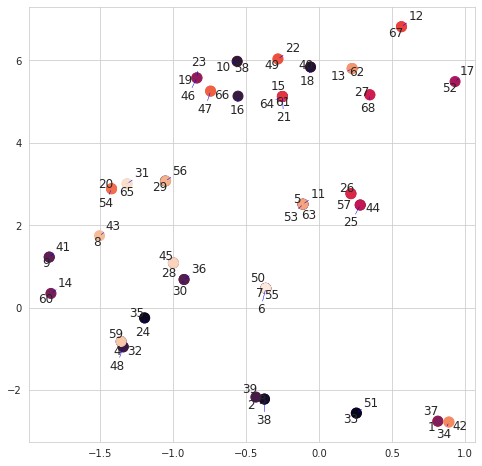

In [6]:
# 解决标签覆盖问题
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(fitted_vec[:, 0].reshape(-1), fitted_vec[:, 1].reshape(-1), s=100, c=colors)

new_texts = [plt.text(x_, y_,'{0}'.format(text + 1), fontsize=12) for text,( x_, y_) in  enumerate(fitted_vec)]
adjust_text(new_texts,arrowprops=dict(arrowstyle='-',color='b',lw=0.5))
fig_name = dt.now().strftime("%Y__%m__%d__%H__%M__%S " + flag_name + " time =" + str(time) + ".png")
file_name = rw_directory.temp_file_path(6, fig_name)
fig.savefig(file_name, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()